In [1]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#%config InlineBackend.figure_formats = ['pdf']

In [2]:
filename = '4rand.json'
with open(filename) as json_file:
    data = json.load(json_file)
testRuns = pd.io.json.json_normalize(data)
#testRuns = testRuns.loc[testRuns['tripGenRate'] < 0.06]
#testRuns = testRuns.loc[testRuns['tripGenRate'] > 0.00]
testRunsComp = testRuns.loc[testRuns['step'] == 3600]
#testRunsComp = testRunsComp.loc[testRunsComp['lastTripStep'] >= 3599]
testRunsComp.loc[testRunsComp['lanePolicy'] == False, 'hovMin'] = 0
testRunsComp

/home/dave/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,step,timeMins,numTravelers,averageTrips,averageSteps,averageStepsPerTrip,tripsCompleted,passengerSteps,stepsWithPassenger,stepsWithoutPassenger,...,distWithPassenger,distWithoutPassenger,lastTripStep,lanePolicy,numVehicles,grids,density,tripGenRate,hovMin,seed
5,3600,60.0,23425,0,0,0,34430,8976642,7889615,407089,...,2844915,271280,2678,True,2304,4,144,0.2,1,1602181356064
11,3600,60.0,23808,9,1078,119,34047,11202766,8048471,248233,...,3777101,149365,3056,True,2304,4,144,0.2,2,1602181356064
17,3600,60.0,43823,0,0,0,14032,3589078,7865937,430767,...,1305159,224742,1391,False,2304,4,144,0.2,0,1602181356064
23,3600,60.0,28525,2483,2785849,1121,27066,13863203,7949475,347229,...,1942570,216403,3599,True,2304,4,144,0.2,1,1602181356065
29,3600,60.0,7598,9098,3044227,334,47993,15835593,8019003,277701,...,4959311,170900,3599,True,2304,4,144,0.2,2,1602181356065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,3600,60.0,24279,2370,1677630,707,30595,13630217,8029574,267130,...,3183612,159597,3515,True,2304,4,144,0.2,2,1602181356126
1133,3600,60.0,51763,0,0,0,3111,494339,7849849,446855,...,465473,210032,649,False,2304,4,144,0.2,0,1602181356126
1139,3600,60.0,37844,0,0,0,24800,10929554,8079055,217649,...,1758114,133207,2925,True,2304,4,144,0.2,1,1602181356127
1145,3600,60.0,11302,7595,2870396,377,51342,16369840,8101867,194837,...,5115714,120811,3599,True,2304,4,144,0.2,2,1602181356127


In [3]:
testRunsComp.loc[testRunsComp.tripsCompleted.idxmax()]

step                                       3600
timeMins                                     60
numTravelers                               5610
averageTrips                               9309
averageSteps                            2923936
averageStepsPerTrip                         314
tripsCompleted                            56285
passengerSteps                         14623926
stepsWithPassenger                      7906264
stepsWithoutPassenger                    390440
stepsTravelingWithPassenger             2733794
stepsTravelingWithoutPassenger           178795
distWithPassenger                       4289025
distWithoutPassenger                     277766
lastTripStep                               3599
lanePolicy                                 True
numVehicles                                2304
grids                                         4
density                                     144
tripGenRate                                 0.2
hovMin                                  

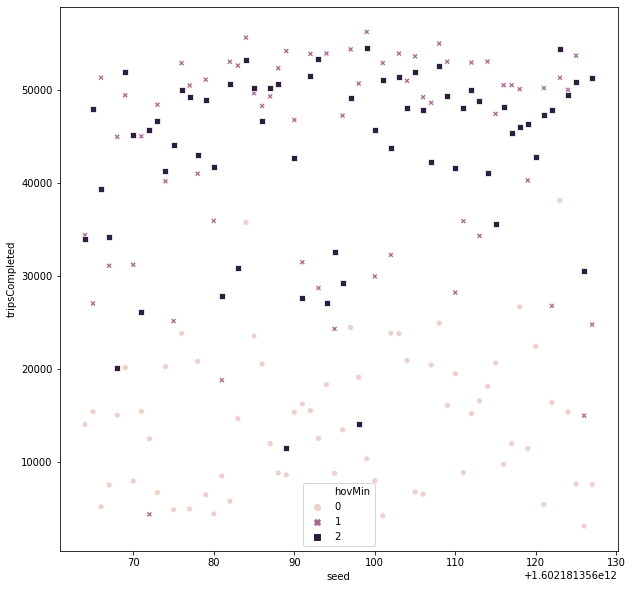

In [4]:
df = testRunsComp
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
sns.scatterplot("seed", "tripsCompleted", data=testRunsComp, hue='hovMin', style='hovMin', ax=ax)

In [5]:
tmp = testRunsComp.loc[testRunsComp.groupby(['seed']).tripsCompleted.idxmax().values]
tmp

,step,timeMins,numTravelers,averageTrips,averageSteps,averageStepsPerTrip,tripsCompleted,passengerSteps,stepsWithPassenger,stepsWithoutPassenger,...,distWithPassenger,distWithoutPassenger,lastTripStep,lanePolicy,numVehicles,grids,density,tripGenRate,hovMin,seed
5,3600,60.0,23425,0,0,0,34430,8976642,7889615,407089,...,2844915,271280,2678,True,2304,4,144,0.2,1,1602181356064
29,3600,60.0,7598,9098,3044227,334,47993,15835593,8019003,277701,...,4959311,170900,3599,True,2304,4,144,0.2,2,1602181356065
41,3600,60.0,4337,9345,2416738,258,51356,15239866,7846812,449892,...,3927540,329981,3599,True,2304,4,144,0.2,1,1602181356066
65,3600,60.0,23622,0,0,0,34226,10951026,8090918,205786,...,3628175,122566,2886,True,2304,4,144,0.2,2,1602181356067
77,3600,60.0,9371,6363,3042792,478,44993,14772812,7901335,395369,...,3436012,274918,3599,True,2304,4,144,0.2,1,1602181356068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,3600,60.0,7162,9368,2942371,314,54446,16290646,8069748,226956,...,5424629,140211,3599,True,2304,4,144,0.2,2,1602181356123
1085,3600,60.0,7566,8096,2514032,310,50049,16610661,7973835,322869,...,3519880,220744,3599,True,2304,4,144,0.2,1,1602181356124
1103,3600,60.0,3613,10438,2761833,264,53726,14643326,7824960,471744,...,4218947,347787,3599,True,2304,4,144,0.2,1,1602181356125
1127,3600,60.0,24279,2370,1677630,707,30595,13630217,8029574,267130,...,3183612,159597,3515,True,2304,4,144,0.2,2,1602181356126


In [6]:
tmp[tmp.hovMin == 2]

,step,timeMins,numTravelers,averageTrips,averageSteps,averageStepsPerTrip,tripsCompleted,passengerSteps,stepsWithPassenger,stepsWithoutPassenger,...,distWithPassenger,distWithoutPassenger,lastTripStep,lanePolicy,numVehicles,grids,density,tripGenRate,hovMin,seed
29,3600,60.0,7598,9098,3044227,334,47993,15835593,8019003,277701,...,4959311,170900,3599,True,2304,4,144,0.2,2,1602181356065
65,3600,60.0,23622,0,0,0,34226,10951026,8090918,205786,...,3628175,122566,2886,True,2304,4,144,0.2,2,1602181356067
101,3600,60.0,6279,9448,2899666,306,51926,16035352,8054522,242182,...,5347157,149018,3599,True,2304,4,144,0.2,2,1602181356069
119,3600,60.0,13118,5880,2891688,491,45218,15118053,8079796,216908,...,4712551,134773,3599,True,2304,4,144,0.2,2,1602181356070
155,3600,60.0,10515,8517,3636824,427,45706,15685171,8049839,246865,...,4791039,150326,3599,True,2304,4,144,0.2,2,1602181356072
191,3600,60.0,13794,6777,4233406,624,41287,15871873,8056198,240506,...,4415876,148114,3599,True,2304,4,144,0.2,2,1602181356074
209,3600,60.0,14207,5224,2898089,554,44110,15456389,8047194,249510,...,4495624,150956,3599,True,2304,4,144,0.2,2,1602181356075
263,3600,60.0,16385,5181,3010320,581,43008,15191842,8113363,183341,...,4422036,108030,3599,True,2304,4,144,0.2,2,1602181356078
299,3600,60.0,16112,3202,1363696,425,41746,14180190,8076153,220551,...,4417643,133783,3585,True,2304,4,144,0.2,2,1602181356080
317,3600,60.0,33165,0,0,0,27861,9840605,8105001,191703,...,2926489,114761,2635,True,2304,4,144,0.2,2,1602181356081


In [7]:
testRunsComp = testRunsComp[testRunsComp.seed.isin(tmp.loc[tmp.hovMin == 2].seed.values)]
#testRunsComp = testRunsComp[testRunsComp.lastTripStep == 3599]
testRunsComp

,step,timeMins,numTravelers,averageTrips,averageSteps,averageStepsPerTrip,tripsCompleted,passengerSteps,stepsWithPassenger,stepsWithoutPassenger,...,distWithPassenger,distWithoutPassenger,lastTripStep,lanePolicy,numVehicles,grids,density,tripGenRate,hovMin,seed
23,3600,60.0,28525,2483,2785849,1121,27066,13863203,7949475,347229,...,1942570,216403,3599,True,2304,4,144,0.2,1,1602181356065
29,3600,60.0,7598,9098,3044227,334,47993,15835593,8019003,277701,...,4959311,170900,3599,True,2304,4,144,0.2,2,1602181356065
35,3600,60.0,40169,0,0,0,15422,4920055,7895906,400798,...,1375959,246445,2129,False,2304,4,144,0.2,0,1602181356065
59,3600,60.0,26725,0,0,0,31123,8175073,7964005,332699,...,2600788,219388,2673,True,2304,4,144,0.2,1,1602181356067
65,3600,60.0,23622,0,0,0,34226,10951026,8090918,205786,...,3628175,122566,2886,True,2304,4,144,0.2,2,1602181356067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,3600,60.0,24279,2370,1677630,707,30595,13630217,8029574,267130,...,3183612,159597,3515,True,2304,4,144,0.2,2,1602181356126
1133,3600,60.0,51763,0,0,0,3111,494339,7849849,446855,...,465473,210032,649,False,2304,4,144,0.2,0,1602181356126
1139,3600,60.0,37844,0,0,0,24800,10929554,8079055,217649,...,1758114,133207,2925,True,2304,4,144,0.2,1,1602181356127
1145,3600,60.0,11302,7595,2870396,377,51342,16369840,8101867,194837,...,5115714,120811,3599,True,2304,4,144,0.2,2,1602181356127


In [8]:
testRunsComp.tripGenRate.describe()

count    7.500000e+01
mean     2.000000e-01
std      3.073673e-16
min      2.000000e-01
25%      2.000000e-01
50%      2.000000e-01
75%      2.000000e-01
max      2.000000e-01
Name: tripGenRate, dtype: float64

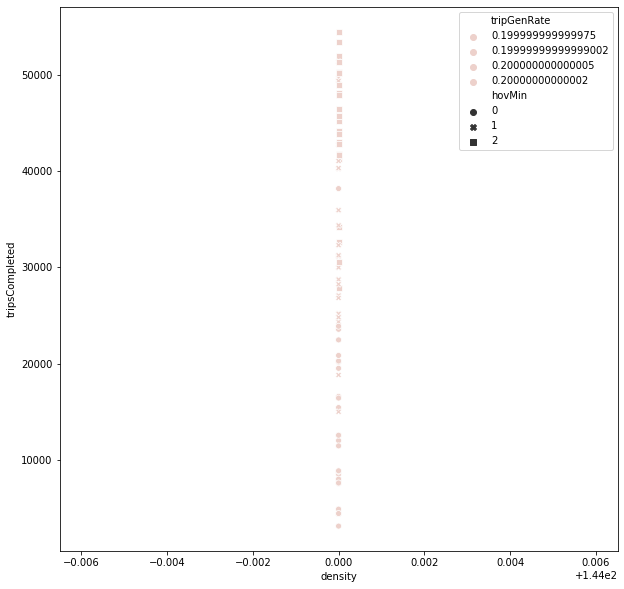

In [9]:
df = testRunsComp
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
sns.scatterplot("density", "tripsCompleted", data=testRunsComp, hue='tripGenRate', style='hovMin', ax=ax)

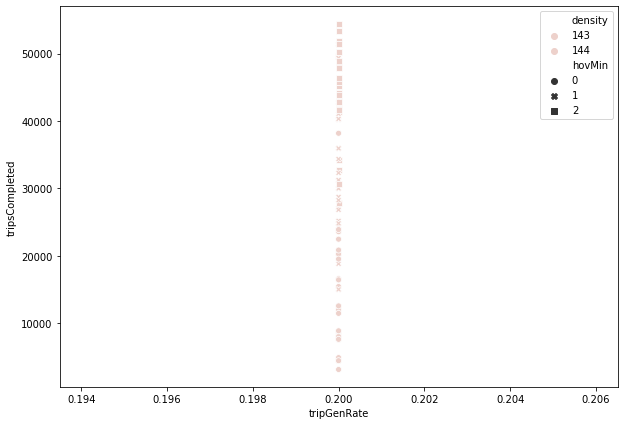

In [10]:
df = testRunsComp
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
sns.scatterplot("tripGenRate", "tripsCompleted", data=testRunsComp, hue='density', style='hovMin', ax=ax)

In [11]:
grids = 4
df = testRunsComp
numRoadCells = (16*grids*2*(grids*2+1)*2 + (16*grids*2*grids*2)) * 2
df['averageSpeedWithPassenger'] = df['distWithPassenger'].div(df['stepsWithPassenger']) * 7.5 / 1000 * 60 * 60 
df['averageSpeedWithoutPassenger'] = df['distWithoutPassenger'].div(df['stepsWithoutPassenger'])
df['averageSpeed'] = (df['distWithPassenger'].add(df['distWithoutPassenger'])).div(df['stepsWithoutPassenger'].add(df['stepsWithPassenger'])) * 7.5 / 1000 * 60 * 60 
df['averageStepsWithoutPassenger'] = df['stepsWithoutPassenger'].div(df['numVehicles'])
df['averageStepsTravelingWithoutPassenger'] = df['stepsTravelingWithoutPassenger'].div(df['numVehicles'])
df['densityCell'] = df['numVehicles'].div(numRoadCells)
df['densityKm'] = df['numVehicles'].div(numRoadCells)/7.5*1000
densityLabelsCell = np.around(np.arange(0.1, 0.575, 0.025), 3)
densityBinsCell = np.arange(0.075, 0.575, 0.025)
densityLabelsKm = np.arange(20, 75, 5)
densityBinsKm = np.arange(15, 75, 5)
df['densityBin'] = pd.cut(df['densityKm'], densityBinsKm, labels = densityLabelsKm)
testRuns = df
32*grids*grids/numRoadCells/7.5*1000

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

10.256410256410257

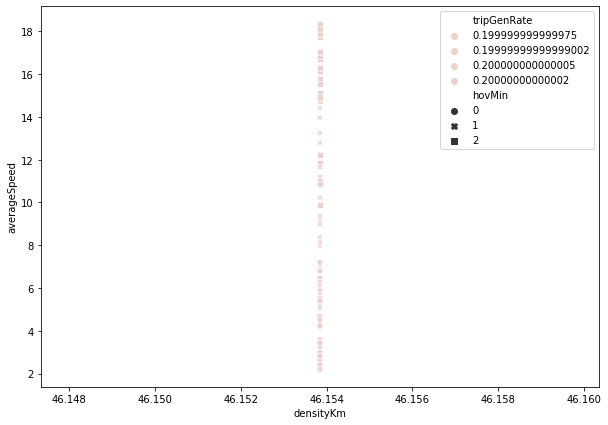

In [12]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
sns.scatterplot("densityKm", "averageSpeed", data=testRunsComp, hue='tripGenRate', style='hovMin', ax=ax)

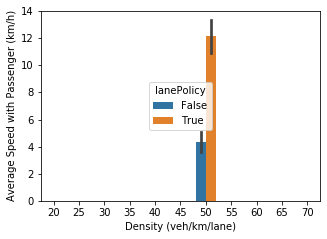

In [13]:
plt.figure(figsize=(5,3.5))
#plt.rcParams.update({'font.family': 'Times New Roman'})
g = sns.barplot("densityBin", "averageSpeedWithPassenger", data=testRuns, hue='lanePolicy')
plt.xlabel("Density (veh/km/lane)")
plt.ylabel("Average Speed with Passenger (km/h)")
#plt.xticks(rotation=-90)
plt.show(g)

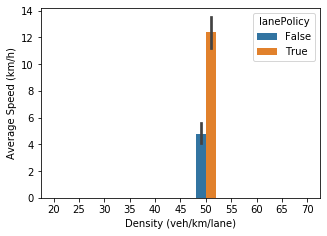

In [14]:
plt.figure(figsize=(5,3.5))
#plt.rcParams.update({'font.family': 'Times New Roman'})
g = sns.barplot("densityBin", "averageSpeed", data=testRuns, hue='lanePolicy')
plt.xlabel("Density (veh/km/lane)")
plt.ylabel("Average Speed (km/h)")
#plt.xticks(rotation=-90)
plt.show(g)

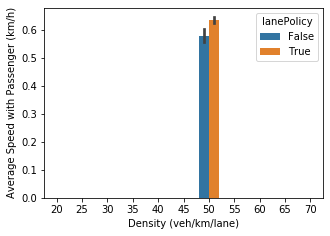

In [15]:
plt.figure(figsize=(5,3.5))
#plt.rcParams.update({'font.family': 'Times New Roman'})
g = sns.barplot("densityBin", "averageSpeedWithoutPassenger", data=testRuns, hue='lanePolicy')
plt.xlabel("Density (veh/km/lane)")
plt.ylabel("Average Speed with Passenger (km/h)")
#plt.xticks(rotation=-90)
plt.show(g)

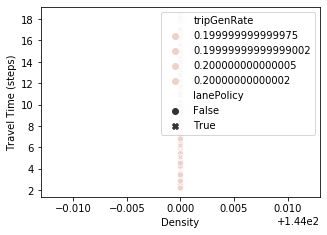

In [16]:
plt.figure(figsize=(5,3.5))
g = sns.scatterplot("density", "averageSpeed", data=testRuns, hue='tripGenRate', style='lanePolicy')
#g.set(xlim=(0,50))
#plt.legend(title="Lane Policy")
plt.xlabel("Density")
plt.ylabel("Travel Time (steps)")
plt.show(g)